In [3]:
#開始分析
%pylab inline

import numpy as np
import pandas as pd
# get data
import pandas_datareader as pdr
# visual
import matplotlib.pyplot as plt
import mpl_finance as mpf
import seaborn as sns
#time
import datetime as datetime
#talib
import talib

#

start = datetime.datetime(2020,5,1)
stock=input()

df = pdr.DataReader(stock, 'yahoo', start=start)

df.tail(10).round(2)

D:\Users\he6474\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['std']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Populating the interactive namespace from numpy and matplotlib


 2448.TW


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-16,39.15,38.10,38.80,38.35,22810230,38.35
2020-07-17,38.75,37.60,38.65,37.75,15907813,37.75
2020-07-20,37.95,36.25,37.90,36.70,22372937,36.70
2020-07-21,38.30,36.95,36.95,38.25,19803829,38.25
2020-07-22,38.90,38.30,38.30,38.50,12840752,38.50
2020-07-23,39.50,38.50,38.75,39.40,27718441,39.40
2020-07-24,40.20,38.20,39.75,38.55,49725415,38.55
2020-07-27,40.20,38.80,39.10,40.00,45829005,40.00
2020-07-28,44.00,41.00,41.00,44.00,145311194,44.00


buy point: 0
sell point: 3


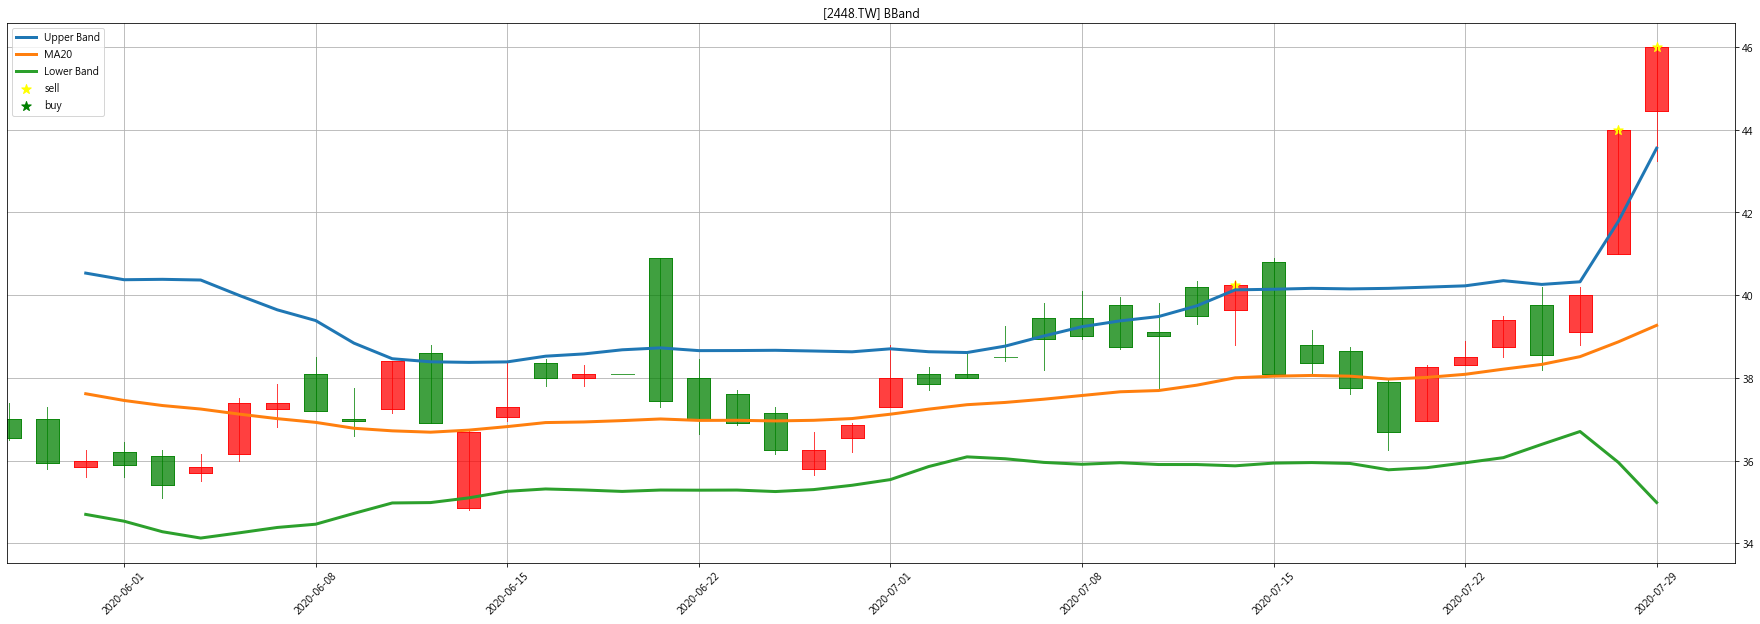

In [4]:
df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
fig = plt.figure(figsize=(24, 15))
ax = fig.add_axes([0,0.2,1,0.5]) 

ax.set_xticks(range(0, len(df.index), 5))
ax.set_xticklabels(df.index[::5],rotation=45)
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

#
#布林
middle = df['Close'].rolling(20).mean()
std = df['Close'].rolling(20).std()

upper = middle + 2* std
lower = middle - 2* std
B = (df['Close']-lower) / (upper-lower)
#
plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] #設置字體 Microsoft JhengHei
ax.plot(upper, label='Upper Band',lw=3)
ax.plot(middle, label='MA20',lw=3)
ax.plot(lower, label='Lower Band',lw=3)
ax.legend(loc='upper left');   #loc='upper left'左上， 如果空白 ax.legend() 表示右上
ax.set_axisbelow(True) # 設定格線在最底圖層
ax.grid(True) # 畫格線
ax.yaxis.set_ticks_position('right')
#


#
# 買點
chk_b1 = df['Close']<lower
b1 = df[chk_b1]
print('buy point:', len(b1))
#b1
# 賣點
chk_s1 = df['Close']>upper
s1 = df[chk_s1]
print('sell point:', len(s1))
#s1

# 點出買賣點
ax.scatter(s1.index, s1['Close'], marker='*', color='yellow', label='sell',s=100)
ax.scatter(b1.index, b1['Close'], marker='*', color='green', label='buy',s=100)

#
plt.title('[%s] BBand' %(stock))
plt.legend()
plt.show()

#df.tail(7).round(2)